### The Titanic dataset is a classic dataset widely used for learning and practicing machine learning techniques. It contains information about passengers aboard the RMS Titanic, which tragically sank in 1912. The dataset includes features such as:

### Passenger ID: Unique identifier for each passenger.
### Pclass: Ticket class (1st, 2nd, 3rd).
### Sex: Gender of the passenger.
### Age: Age of the passenger.
### SibSp: Number of siblings/spouses aboard.
### Parch: Number of parents/children aboard.
### Fare: Ticket price.
### Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,recall_score ,f1_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("train_titanic.csv")
test = pd.read_csv("test_titanic.csv")

Explore Data

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.sample()  # Random line

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.55,C87,S


In [6]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
train.shape

(891, 12)

In [9]:
test.shape

(418, 11)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
null=train.isnull().sum()
null[null>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

<Axes: >

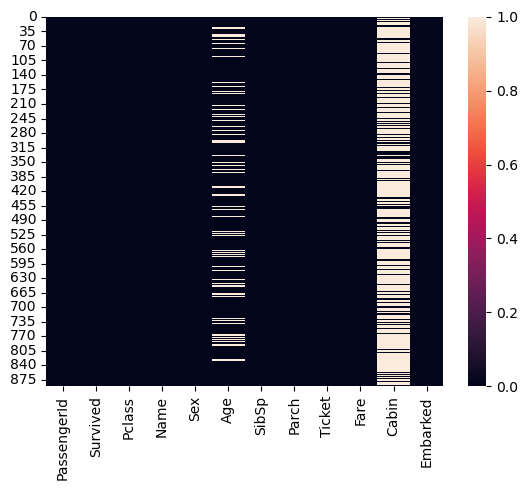

In [14]:
sns.heatmap(train.isnull())

Clean Data

In [16]:
train.drop(columns=['Cabin','Name','Ticket','Embarked','Fare'],axis=1,inplace=True)


In [17]:
test.drop(columns=['Cabin','Name','Ticket','Embarked','Fare'],axis=1,inplace=True)

In [18]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0


In [19]:
m=train['Age'].median()
train['Age'].fillna(m,inplace=True)
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
dtype: int64

In [20]:
m=test['Age'].median()
test['Age'].fillna(m,inplace=True)
test.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
dtype: int64

In [21]:
train.dropna()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0
887,888,1,1,female,19.0,0,0
888,889,0,3,female,28.0,1,2
889,890,1,1,male,26.0,0,0


In [22]:
test.dropna()

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,male,34.5,0,0
1,893,3,female,47.0,1,0
2,894,2,male,62.0,0,0
3,895,3,male,27.0,0,0
4,896,3,female,22.0,1,1
...,...,...,...,...,...,...
413,1305,3,male,27.0,0,0
414,1306,1,female,39.0,0,0
415,1307,3,male,38.5,0,0
416,1308,3,male,27.0,0,0


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 48.9+ KB


Data Analysis

In [25]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0


In [26]:
corr=train.drop(columns="Sex",axis=1).corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000


<Axes: >

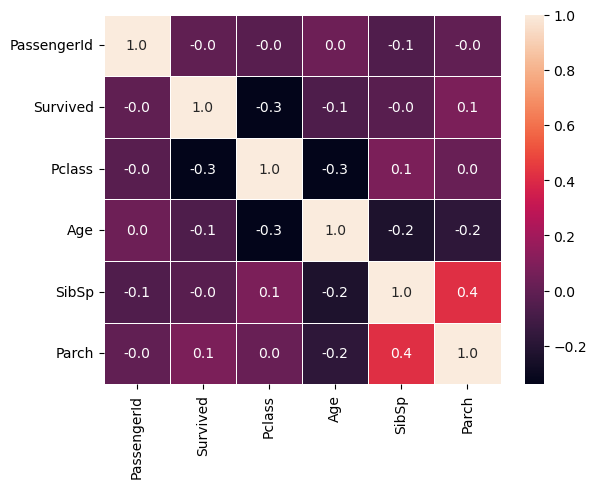

In [27]:
sns.heatmap(corr,annot=True,fmt='.1f',linewidths=0.5)

<Axes: >

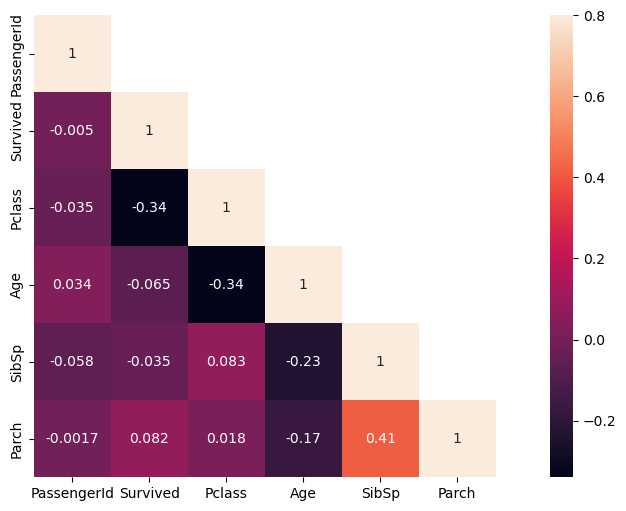

In [28]:
corrMatt = train.drop(columns="Sex",axis=1).corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(14,6)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [29]:
train.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [30]:
train.Sex.value_counts()


Sex
male      577
female    314
Name: count, dtype: int64

<Axes: ylabel='count'>

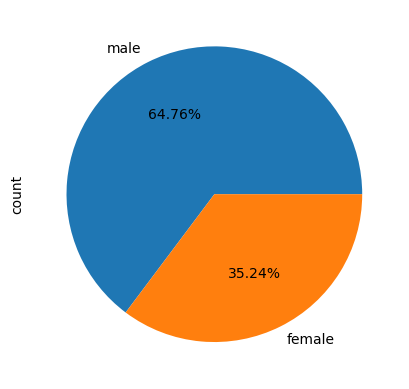

In [31]:
train.Sex.value_counts().plot.pie(autopct='%0.2f%%')

<Axes: xlabel='Sex', ylabel='count'>

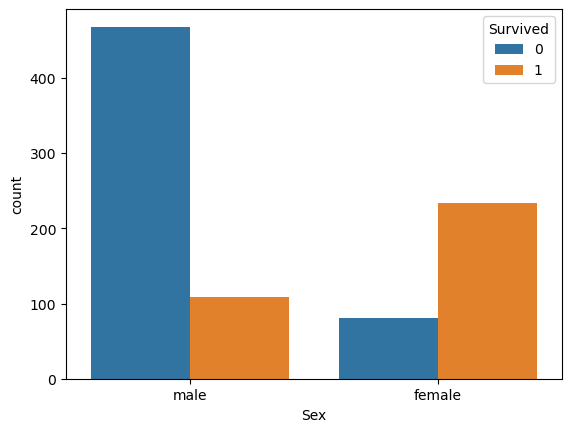

In [32]:
sns.countplot(x='Sex', hue='Survived', data=train)


<Axes: xlabel='Pclass', ylabel='count'>

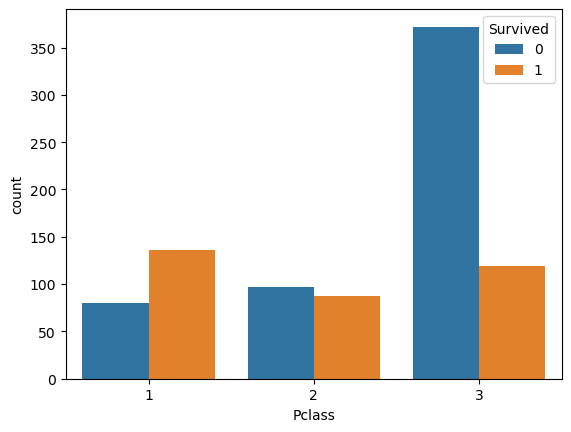

In [33]:
sns.countplot(x='Pclass', hue='Survived', data=train)


<Axes: xlabel='Age', ylabel='Count'>

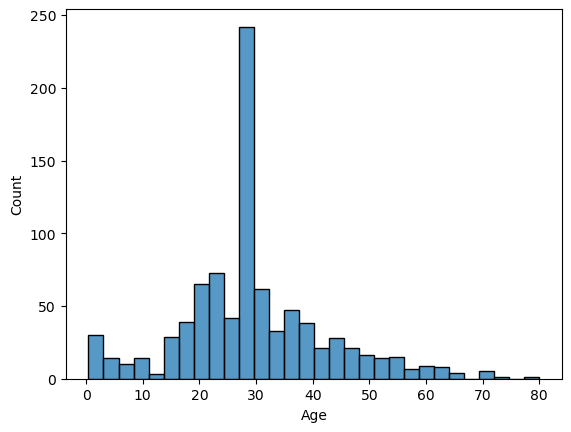

In [34]:
sns.histplot(train.Age)


Transform data from object to int by using - Label Encoding -

In [36]:
train['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [37]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [38]:
train['Sex'] = label_encoder.fit_transform(train[['Sex']])

In [39]:
test['Sex'] = label_encoder.transform(test['Sex'])

In [40]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,1,22.0,1,0
1,2,1,1,0,38.0,1,0
2,3,1,3,0,26.0,0,0
3,4,1,1,0,35.0,1,0
4,5,0,3,1,35.0,0,0


In [41]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,1,34.5,0,0
1,893,3,0,47.0,1,0
2,894,2,1,62.0,0,0
3,895,3,1,27.0,0,0
4,896,3,0,22.0,1,1


Creat Model

In [43]:
x=train.drop(['Survived'],axis=1)
y=train['Survived']

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1234)

In [45]:
Accuracies = []
recalls=[]
f_1=[]

In [46]:
def all(model):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    accuracy = accuracy_score(pred,y_test)
    Accuracies.append(accuracy)
    print(f'accuracy of {model} : {accuracy}')
   

In [47]:
m1=LogisticRegression()
m2=SVC()
m3=RandomForestClassifier()
m4=GradientBoostingClassifier(n_estimators=1000)
m5=DecisionTreeClassifier()
m6=KNeighborsClassifier()
m7=GaussianNB()


In [48]:
all(m1)
all(m2)
all(m3)
all(m4)
all(m5)
all(m6)
all(m7)

accuracy of LogisticRegression() : 0.8379888268156425
accuracy of SVC() : 0.6089385474860335
accuracy of RandomForestClassifier() : 0.7988826815642458
accuracy of GradientBoostingClassifier(n_estimators=1000) : 0.7932960893854749
accuracy of DecisionTreeClassifier() : 0.7262569832402235
accuracy of KNeighborsClassifier() : 0.5754189944134078
accuracy of GaussianNB() : 0.8212290502793296


In [49]:
Algorithms=['LogisticRegression','SVC','RandomForestClassifier','GradientBoostingClassifier',
            'DecisionTreeClassifier','KNeighborsClassifier','GaussianNB']

In [50]:
df = pd.DataFrame({
   'Algorithms' : Algorithms,
   'Accuracies' : Accuracies
})

In [51]:
df

,Algorithms,Accuracies
0,LogisticRegression,0.837989
1,SVC,0.608939
2,RandomForestClassifier,0.798883
3,GradientBoostingClassifier,0.793296
4,DecisionTreeClassifier,0.726257
5,KNeighborsClassifier,0.575419
6,GaussianNB,0.821229


for test data

In [53]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [54]:
import joblib

joblib.dump(log_reg, 'log_reg_classifie.pkl')
print("Model saved successfully!")

Model saved successfully!


In [55]:
predd=log_reg.predict(test)

In [56]:
final = test.PassengerId

In [57]:
df2 = pd.DataFrame({
    'PassengerId' : final,
    'Survived' : predd 
})

In [58]:
df2.head(15)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
